In [1]:
import numpy as np
import pandas as pd
import io
import requests
import seaborn as sns
from matplotlib import pyplot as plt
from scipy.stats import zscore
from sklearn.svm import SVR
import pickle
import os
import joblib
import plotly.express as px
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import power_transform
from pandas.api.types import CategoricalDtype
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.tree import DecisionTreeRegressor
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.pipeline import FeatureUnion
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.metrics import r2_score
%matplotlib inline

In [3]:
df = pd.read_csv(r"C:\Users\ARNAB\Downloads\database_IND.csv")
df

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,...,2019.0,2.41461,617.789264,843.747000,886.004428,663.774500,626.239128,NaN,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,...,2019.0,NaN,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000,NaN,Central Electricity Authority,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,IND,India,YERMARUS TPP,IND0000513,1600.0,16.2949,77.3568,Coal,Oil,NaN,...,2019.0,NaN,NaN,0.994875,233.596650,865.400000,686.500000,NaN,Central Electricity Authority,NaN
903,IND,India,Yelesandra Solar Power Plant,WRI1026222,3.0,12.8932,78.1654,Solar,NaN,NaN,...,NaN,1.92500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
904,IND,India,Yelisirur wind power project,WRI1026776,25.5,15.2758,75.5811,Wind,NaN,NaN,...,NaN,2.05400,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
905,IND,India,ZAWAR MINES,WRI1019901,80.0,24.3500,73.7477,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
df.shape

(907, 27)

In [6]:
df.isnull().sum()

country                       0
country_long                  0
name                          0
gppd_idnr                     0
capacity_mw                   0
latitude                     46
longitude                    46
primary_fuel                  0
other_fuel1                 709
other_fuel2                 906
other_fuel3                 907
commissioning_year          374
owner                       563
source                        0
url                           0
geolocation_source           19
wepp_id                     907
year_of_capacity_data       388
generation_gwh_2013         461
generation_gwh_2014         503
generation_gwh_2015         479
generation_gwh_2016         467
generation_gwh_2017         461
generation_gwh_2018         454
generation_gwh_2019         906
generation_data_source      453
estimated_generation_gwh    907
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 907 entries, 0 to 906
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   country                   907 non-null    object 
 1   country_long              907 non-null    object 
 2   name                      907 non-null    object 
 3   gppd_idnr                 907 non-null    object 
 4   capacity_mw               907 non-null    float64
 5   latitude                  861 non-null    float64
 6   longitude                 861 non-null    float64
 7   primary_fuel              907 non-null    object 
 8   other_fuel1               198 non-null    object 
 9   other_fuel2               1 non-null      object 
 10  other_fuel3               0 non-null      float64
 11  commissioning_year        533 non-null    float64
 12  owner                     344 non-null    object 
 13  source                    907 non-null    object 
 14  url       

In [8]:
df.drop(['estimated_generation_gwh','wepp_id','other_fuel3','other_fuel1','other_fuel2'],axis=1,inplace=True)

In [9]:
df.isnull().sum()

country                     0
country_long                0
name                        0
gppd_idnr                   0
capacity_mw                 0
latitude                   46
longitude                  46
primary_fuel                0
commissioning_year        374
owner                     563
source                      0
url                         0
geolocation_source         19
year_of_capacity_data     388
generation_gwh_2013       461
generation_gwh_2014       503
generation_gwh_2015       479
generation_gwh_2016       467
generation_gwh_2017       461
generation_gwh_2018       454
generation_gwh_2019       906
generation_data_source    453
dtype: int64

In [10]:
df.drop(['gppd_idnr','owner','generation_data_source'],axis=1,inplace=True)

In [11]:
df.isnull().sum()

country                    0
country_long               0
name                       0
capacity_mw                0
latitude                  46
longitude                 46
primary_fuel               0
commissioning_year       374
source                     0
url                        0
geolocation_source        19
year_of_capacity_data    388
generation_gwh_2013      461
generation_gwh_2014      503
generation_gwh_2015      479
generation_gwh_2016      467
generation_gwh_2017      461
generation_gwh_2018      454
generation_gwh_2019      906
dtype: int64

In [12]:
df.describe()

,capacity_mw,latitude,longitude,commissioning_year,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
count,907.000000,861.000000,861.000000,533.000000,519.0,446.000000,404.000000,428.000000,440.000000,446.000000,453.000000
mean,326.223755,21.197918,77.464907,1997.078799,2019.0,436.579872,2410.620062,2406.769148,2449.949567,2531.301939,2595.299215
std,590.085456,6.239612,4.939316,17.119477,0.0,1624.717598,4002.130125,4170.303340,4139.826108,4174.261177,4294.595169
min,0.000000,8.168900,68.644700,1927.000000,2019.0,-947.600000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,16.725000,16.773900,74.256200,1988.000000,2019.0,0.688250,219.417762,180.793688,186.152062,178.397305,196.054800
50%,59.200000,21.780000,76.719500,2001.000000,2019.0,14.264000,794.587100,697.450781,737.205450,817.977250,798.381000
75%,385.250000,25.512400,79.440800,2012.000000,2019.0,138.133250,3014.967937,3020.045750,3269.942437,3263.677500,3139.308000
max,4760.000000,34.649000,95.408000,2018.000000,2019.0,14779.303000,28127.000000,30539.000000,30015.000000,35116.000000,35136.000000


In [13]:
df['year_of_capacity_data'].nunique()

1

In [14]:
df['name'].nunique()

907

In [15]:
df.drop(['name','url'],axis=1,inplace=True)

In [16]:
df['geolocation_source'].unique()

array(['National Renewable Energy Laboratory', 'WRI', nan,
       'Industry About'], dtype=object)

In [17]:
# filling geolocation_source with mode because category data
df['geolocation_source'].fillna(df['geolocation_source'].mode()[0], inplace=True)

In [18]:
# removing 'year_of_capacity_data' column
df.drop('year_of_capacity_data',axis=1,inplace=True)

In [19]:
# filling null values with median in numerical columns
df.fillna(df.median()[0], inplace=True)

C:\Users\ARNAB\AppData\Local\Temp\ipykernel_7192\3477633083.py:2: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.fillna(df.median()[0], inplace=True)


In [20]:
df.isnull().sum()

country                0
country_long           0
capacity_mw            0
latitude               0
longitude              0
primary_fuel           0
commissioning_year     0
source                 0
geolocation_source     0
generation_gwh_2013    0
generation_gwh_2014    0
generation_gwh_2015    0
generation_gwh_2016    0
generation_gwh_2017    0
generation_gwh_2018    0
generation_gwh_2019    0
dtype: int64

In [21]:
df['source'].nunique()

191

In [22]:
df['geolocation_source'].nunique()

3

In [23]:
df['country'].nunique()

1

In [24]:
df['country_long'].nunique()

1

In [25]:
df.drop(['country','country_long'],axis=1,inplace=True)

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 907 entries, 0 to 906
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   capacity_mw          907 non-null    float64
 1   latitude             907 non-null    float64
 2   longitude            907 non-null    float64
 3   primary_fuel         907 non-null    object 
 4   commissioning_year   907 non-null    float64
 5   source               907 non-null    object 
 6   geolocation_source   907 non-null    object 
 7   generation_gwh_2013  907 non-null    float64
 8   generation_gwh_2014  907 non-null    float64
 9   generation_gwh_2015  907 non-null    float64
 10  generation_gwh_2016  907 non-null    float64
 11  generation_gwh_2017  907 non-null    float64
 12  generation_gwh_2018  907 non-null    float64
 13  generation_gwh_2019  907 non-null    object 
dtypes: float64(10), object(4)
memory usage: 99.3+ KB


<Axes: xlabel='primary_fuel', ylabel='count'>

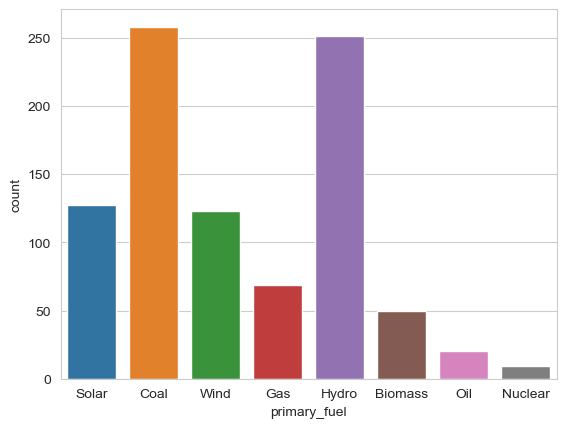

In [27]:
sns.set_style("whitegrid")
sns.countplot(x="primary_fuel", data=df)

In [28]:
df.head()

,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,source,geolocation_source,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019
0,2.5,28.1839,73.2407,Solar,2011.0,National Renewable Energy Laboratory,National Renewable Energy Laboratory,59.20000,59.200000,59.200,59.200000,59.200000,59.200000,59.2
1,98.0,24.7663,74.6090,Coal,59.2,Ultratech Cement ltd,WRI,59.20000,59.200000,59.200,59.200000,59.200000,59.200000,59.2
2,39.2,21.9038,69.3732,Wind,59.2,CDM,WRI,59.20000,59.200000,59.200,59.200000,59.200000,59.200000,59.2
3,135.0,23.8712,91.3602,Gas,2004.0,Central Electricity Authority,WRI,2.41461,617.789264,843.747,886.004428,663.774500,626.239128,59.2
4,1800.0,21.9603,82.4091,Coal,2015.0,Central Electricity Authority,WRI,59.20000,3035.550000,5916.370,6243.000000,5385.579736,7279.000000,59.2


In [29]:
dfcorr=df.corr()

C:\Users\ARNAB\AppData\Local\Temp\ipykernel_7192\3112470342.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  dfcorr=df.corr()


<Axes: >

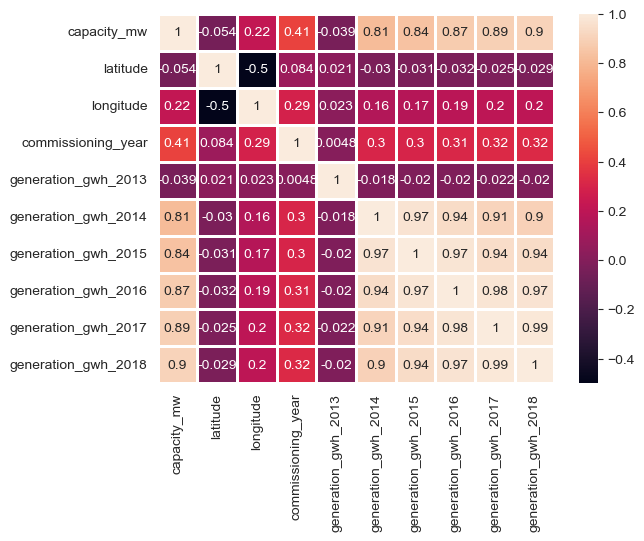

In [30]:
sns.heatmap(dfcorr,annot=True, linewidth=1)

<Axes: xlabel='capacity_mw', ylabel='generation_gwh_2013'>

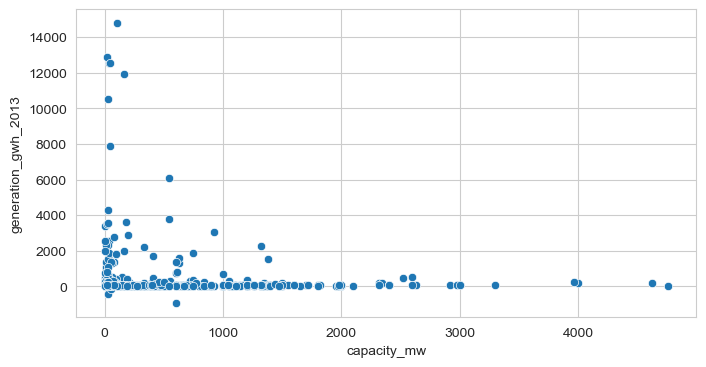

In [31]:
plt.figure(figsize=(8,4))
sns.scatterplot(x='capacity_mw',y='generation_gwh_2013',data=df)

<Axes: xlabel='capacity_mw', ylabel='generation_gwh_2014'>

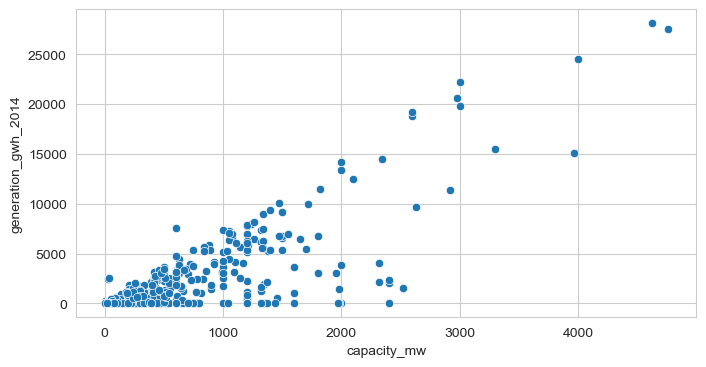

In [32]:
plt.figure(figsize=(8,4))
sns.scatterplot(x='capacity_mw',y='generation_gwh_2014',data=df)

<Axes: xlabel='capacity_mw', ylabel='generation_gwh_2015'>

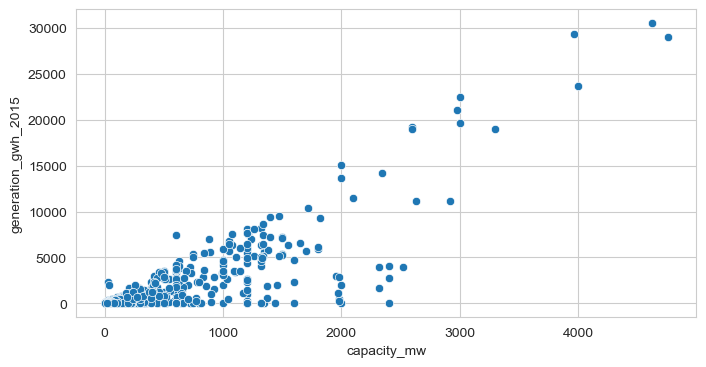

In [33]:
plt.figure(figsize=(8,4))
sns.scatterplot(x='capacity_mw',y='generation_gwh_2015',data=df)

<Axes: xlabel='capacity_mw', ylabel='generation_gwh_2016'>

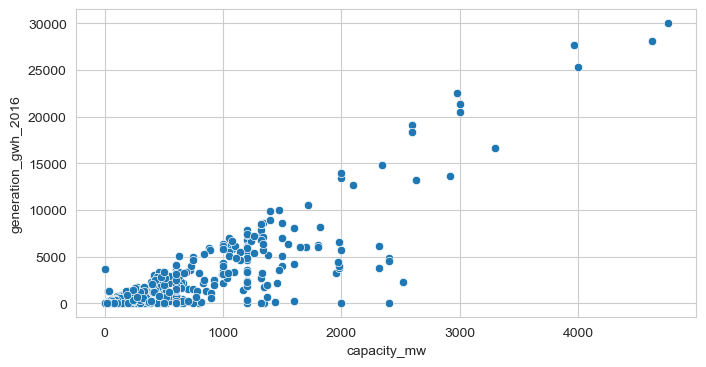

In [34]:
plt.figure(figsize=(8,4))
sns.scatterplot(x='capacity_mw',y='generation_gwh_2016',data=df)

<Axes: xlabel='capacity_mw', ylabel='generation_gwh_2017'>

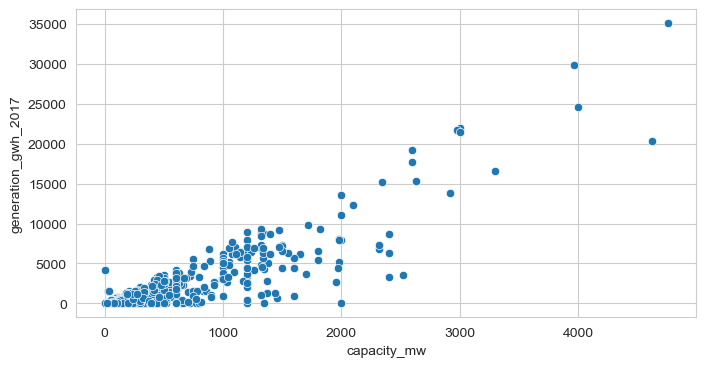

In [35]:
plt.figure(figsize=(8,4))
sns.scatterplot(x='capacity_mw',y='generation_gwh_2017',data=df)

<Axes: xlabel='capacity_mw', ylabel='latitude'>

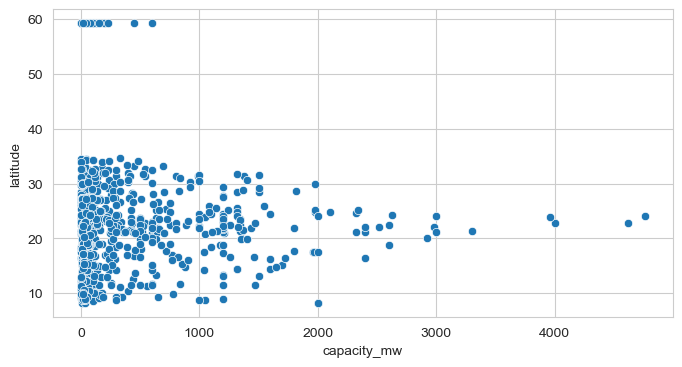

In [36]:
plt.figure(figsize=(8,4))
sns.scatterplot(x='capacity_mw',y='latitude',data=df)

<Axes: xlabel='primary_fuel', ylabel='generation_gwh_2013'>

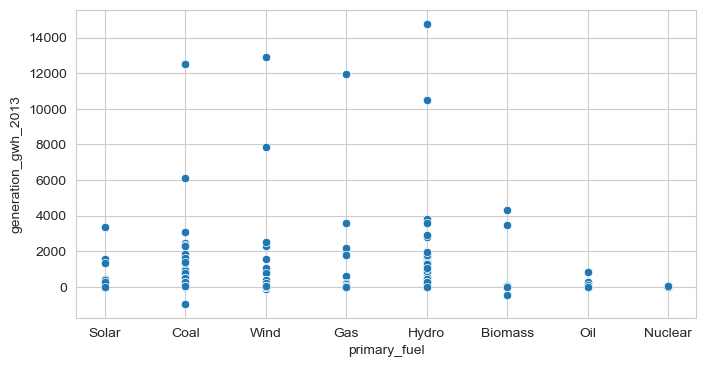

In [37]:
plt.figure(figsize=(8,4))
sns.scatterplot(x='primary_fuel',y='generation_gwh_2013',data=df)

<Axes: xlabel='primary_fuel', ylabel='generation_gwh_2014'>

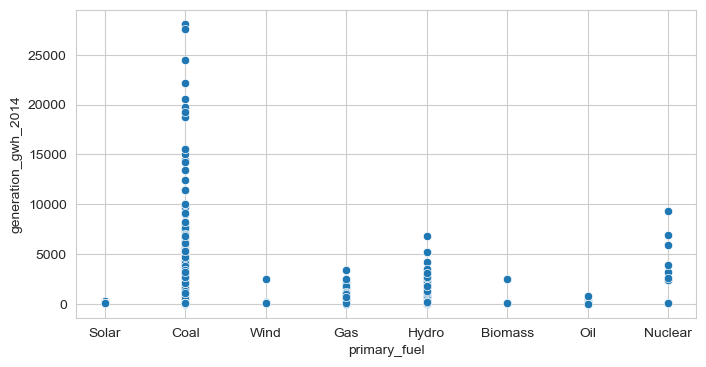

In [38]:
plt.figure(figsize=(8,4))
sns.scatterplot(x='primary_fuel',y='generation_gwh_2014',data=df)

<Axes: xlabel='primary_fuel', ylabel='generation_gwh_2015'>

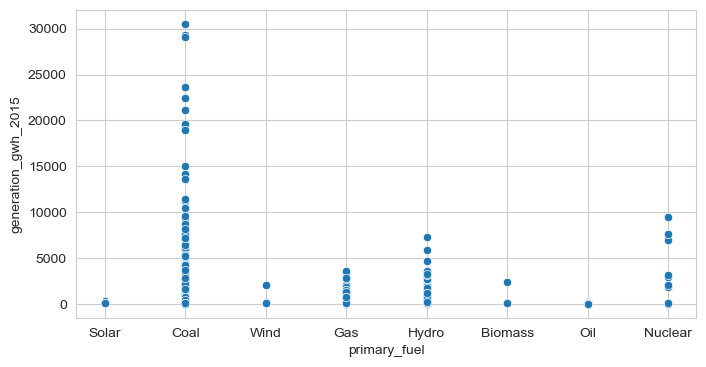

In [39]:
plt.figure(figsize=(8,4))
sns.scatterplot(x='primary_fuel',y='generation_gwh_2015',data=df)

<Axes: xlabel='primary_fuel', ylabel='generation_gwh_2016'>

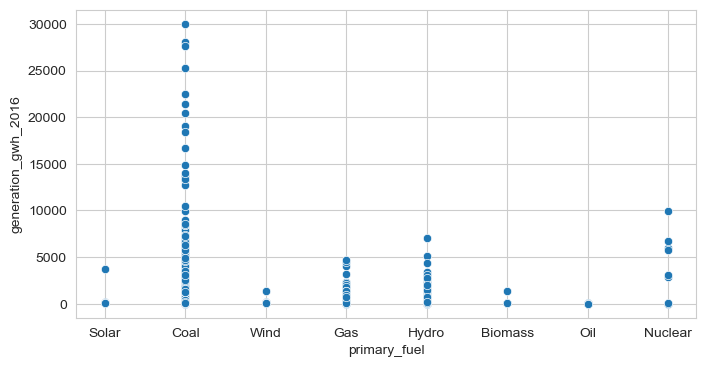

In [40]:
plt.figure(figsize=(8,4))
sns.scatterplot(x='primary_fuel',y='generation_gwh_2016',data=df)

<Axes: xlabel='primary_fuel', ylabel='generation_gwh_2017'>

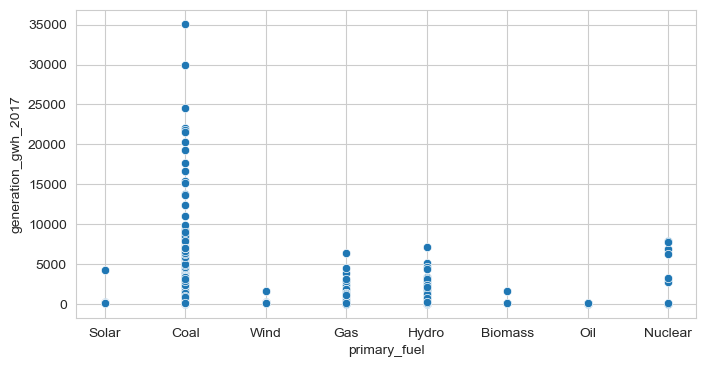

In [41]:
plt.figure(figsize=(8,4))
sns.scatterplot(x='primary_fuel',y='generation_gwh_2017',data=df)

<Axes: xlabel='primary_fuel', ylabel='latitude'>

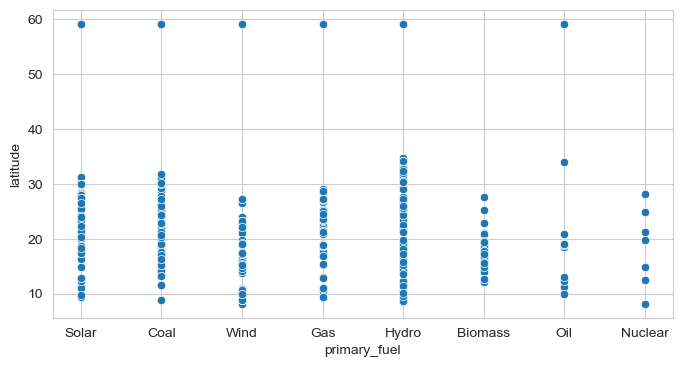

In [42]:
plt.figure(figsize=(8,4))
sns.scatterplot(x='primary_fuel',y='latitude',data=df)

<Axes: xlabel='capacity_mw', ylabel='primary_fuel'>

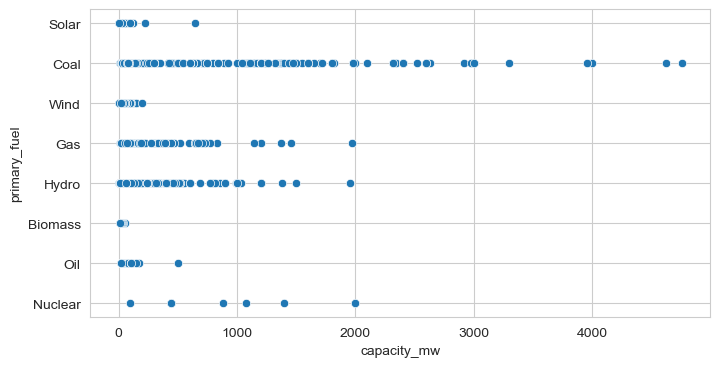

In [43]:
plt.figure(figsize=(8,4))
sns.scatterplot(x='capacity_mw',y='primary_fuel',data=df)

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 907 entries, 0 to 906
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   capacity_mw          907 non-null    float64
 1   latitude             907 non-null    float64
 2   longitude            907 non-null    float64
 3   primary_fuel         907 non-null    object 
 4   commissioning_year   907 non-null    float64
 5   source               907 non-null    object 
 6   geolocation_source   907 non-null    object 
 7   generation_gwh_2013  907 non-null    float64
 8   generation_gwh_2014  907 non-null    float64
 9   generation_gwh_2015  907 non-null    float64
 10  generation_gwh_2016  907 non-null    float64
 11  generation_gwh_2017  907 non-null    float64
 12  generation_gwh_2018  907 non-null    float64
 13  generation_gwh_2019  907 non-null    object 
dtypes: float64(10), object(4)
memory usage: 99.3+ KB


In [45]:
df['primary_fuel'].unique()

array(['Solar', 'Coal', 'Wind', 'Gas', 'Hydro', 'Biomass', 'Oil',
       'Nuclear'], dtype=object)

In [46]:
df['geolocation_source'].unique()

array(['National Renewable Energy Laboratory', 'WRI', 'Industry About'],
      dtype=object)

In [47]:
encoder = LabelEncoder()
df['primary_fuel'] = encoder.fit_transform(df['primary_fuel'])
df['geolocation_source'] = encoder.fit_transform(df['geolocation_source'])
df['source'] = encoder.fit_transform(df['source'])

In [48]:
df['geolocation_source'].unique()

array([1, 2, 0])

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 907 entries, 0 to 906
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   capacity_mw          907 non-null    float64
 1   latitude             907 non-null    float64
 2   longitude            907 non-null    float64
 3   primary_fuel         907 non-null    int32  
 4   commissioning_year   907 non-null    float64
 5   source               907 non-null    int32  
 6   geolocation_source   907 non-null    int32  
 7   generation_gwh_2013  907 non-null    float64
 8   generation_gwh_2014  907 non-null    float64
 9   generation_gwh_2015  907 non-null    float64
 10  generation_gwh_2016  907 non-null    float64
 11  generation_gwh_2017  907 non-null    float64
 12  generation_gwh_2018  907 non-null    float64
 13  generation_gwh_2019  907 non-null    object 
dtypes: float64(10), int32(3), object(1)
memory usage: 88.7+ KB


In [50]:
z=np.abs(zscore(df[['generation_gwh_2013','generation_gwh_2014','generation_gwh_2015','generation_gwh_2016','generation_gwh_2017','capacity_mw']]))
print(np.where(z>3))

(array([ 15,  15,  15,  15,  87, 135, 143, 143, 143, 143, 143, 147, 158,
       209, 209, 209, 209, 209, 262, 308, 308, 308, 308, 308, 363, 364,
       364, 364, 364, 364, 375, 447, 482, 493, 493, 493, 493, 493, 494,
       494, 494, 494, 494, 519, 532, 623, 648, 648, 648, 648, 648, 657,
       657, 657, 657, 657, 695, 695, 695, 695, 695, 718, 721, 721, 721,
       721, 724, 724, 724, 724, 726, 726, 726, 726, 726, 765, 767, 786,
       786, 786, 786, 786, 788, 808, 808, 808, 808, 808, 855, 879, 880,
       880, 880, 880, 880, 884], dtype=int64), array([2, 3, 4, 5, 0, 0, 1, 2, 3, 4, 5, 5, 1, 1, 2, 3, 4, 5, 0, 1, 2, 3,
       4, 5, 5, 1, 2, 3, 4, 5, 5, 0, 5, 1, 2, 3, 4, 5, 1, 2, 3, 4, 5, 0,
       1, 1, 1, 2, 3, 4, 5, 1, 2, 3, 4, 5, 1, 2, 3, 4, 5, 0, 1, 2, 3, 4,
       1, 2, 3, 4, 1, 2, 3, 4, 5, 0, 5, 1, 2, 3, 4, 5, 5, 1, 2, 3, 4, 5,
       0, 0, 1, 2, 3, 4, 5, 0], dtype=int64))


In [51]:
z = np.abs(zscore(df[['generation_gwh_2013','generation_gwh_2014','generation_gwh_2015','generation_gwh_2016','generation_gwh_2017','capacity_mw']]))
threshold = 3
df1 = df[(z<3).all(axis = 1)]

print ("Shape of the dataframe before removing outliers: ", df.shape)
print ("Shape of the dataframe after removing outliers: ", df1.shape)
print ("Percentage of data loss post outlier removal: ", (df.shape[0]-df1.shape[0])/df.shape[0]*100)

Shape of the dataframe before removing outliers:  (907, 14)
Shape of the dataframe after removing outliers:  (872, 14)
Percentage of data loss post outlier removal:  3.8588754134509373


In [52]:
# reassigning the changed dataframe name to our original dataframe name
df=df1.copy()

In [53]:
df.shape

(872, 14)

C:\Users\ARNAB\AppData\Local\Temp\ipykernel_7192\2961916807.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i[1]],color='g')
C:\Users\ARNAB\AppData\Local\Temp\ipykernel_7192\2961916807.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i[1]],color='g')
C:\Users\ARNAB\AppData\Local\Tem

ValueError: could not convert string to float: 'Central Electricity Authority'

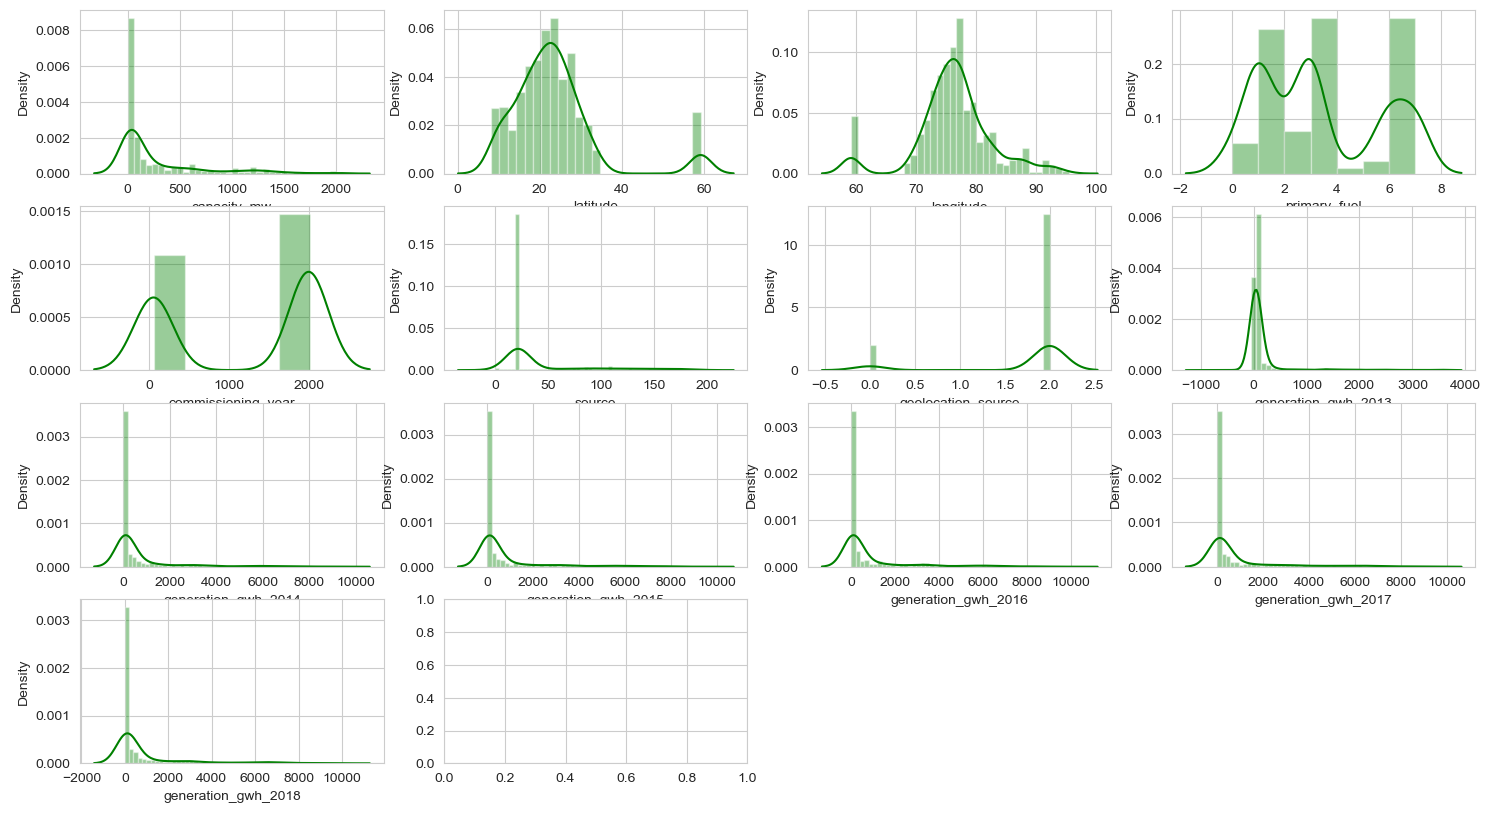

In [54]:
plt.figure(figsize=(18,20))
for i in enumerate(df):
    plt.subplot(8,4,i[0]+1)
    sns.distplot(df[i[1]],color='g')

In [55]:
df.skew()

C:\Users\ARNAB\AppData\Local\Temp\ipykernel_7192\1665899112.py:1: FutureWarning: The default value of numeric_only in DataFrame.skew is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.skew()


capacity_mw            2.045057
latitude               1.923177
longitude             -0.291232
primary_fuel           0.423478
commissioning_year    -0.306237
source                 1.782257
geolocation_source    -2.093441
generation_gwh_2013    5.292559
generation_gwh_2014    2.870849
generation_gwh_2015    2.702937
generation_gwh_2016    2.630682
generation_gwh_2017    2.539093
generation_gwh_2018    2.585727
dtype: float64

In [56]:
df[['capacity_mw',"generation_gwh_2013",'generation_gwh_2014','generation_gwh_2015','generation_gwh_2016','generation_gwh_2017']]=power_transform(df[['capacity_mw',"generation_gwh_2013",'generation_gwh_2014','generation_gwh_2015','generation_gwh_2016','generation_gwh_2017']])
df.skew()

C:\Users\ARNAB\AppData\Local\Temp\ipykernel_7192\956266955.py:2: FutureWarning: The default value of numeric_only in DataFrame.skew is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.skew()


capacity_mw            0.016763
latitude               1.923177
longitude             -0.291232
primary_fuel           0.423478
commissioning_year    -0.306237
source                 1.782257
geolocation_source    -2.093441
generation_gwh_2013   -0.017776
generation_gwh_2014   -0.016997
generation_gwh_2015   -0.015270
generation_gwh_2016   -0.010386
generation_gwh_2017   -0.005460
generation_gwh_2018    2.585727
dtype: float64

In [57]:
x=df.drop(['capacity_mw'],axis=1)
y=df['capacity_mw']

In [58]:
x.shape

(872, 13)

In [59]:
y.shape

(872,)

In [61]:
pd.DataFrame(x).describe()

,latitude,longitude,primary_fuel,commissioning_year,source,geolocation_source,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
count,872.000000,872.000000,872.000000,872.000000,872.000000,872.000000,8.720000e+02,8.720000e+02,8.720000e+02,8.720000e+02,8.720000e+02,872.000000
mean,23.122164,76.426213,3.274083,1174.623853,44.399083,1.722477,4.074213e-18,-2.668609e-16,2.505641e-16,2.632960e-16,8.352137e-17,912.283346
std,10.411029,6.244183,2.280928,958.250967,44.980454,0.688464,1.000574e+00,1.000574e+00,1.000574e+00,1.000574e+00,1.000574e+00,1832.475669
min,8.168900,59.200000,0.000000,59.200000,0.000000,0.000000,-1.370030e+01,-2.914386e+00,-2.891538e+00,-2.808875e+00,-2.697596e+00,0.000000
25%,16.933675,73.714900,1.000000,59.200000,22.000000,2.000000,-2.782933e-01,-4.614798e-01,-4.646856e-01,-4.788085e-01,-4.815026e-01,59.200000
50%,22.121750,76.414850,3.000000,1976.000000,22.000000,2.000000,-1.290421e-01,-4.614798e-01,-4.646856e-01,-4.788085e-01,-4.815026e-01,59.200000
75%,26.802300,79.113975,6.000000,2003.000000,36.250000,2.000000,-1.290421e-01,6.515413e-01,6.759908e-01,6.545616e-01,6.621066e-01,591.134475
max,59.200000,95.408000,7.000000,2018.000000,190.000000,2.000000,6.520689e+00,2.193440e+00,2.151409e+00,2.132703e+00,2.065551e+00,9859.500000


In [62]:
pd.DataFrame(x).describe().T

,count,mean,std,min,25%,50%,75%,max
latitude,872.0,2.312216e+01,10.411029,8.168900,16.933675,22.121750,26.802300,59.200000
longitude,872.0,7.642621e+01,6.244183,59.200000,73.714900,76.414850,79.113975,95.408000
primary_fuel,872.0,3.274083e+00,2.280928,0.000000,1.000000,3.000000,6.000000,7.000000
commissioning_year,872.0,1.174624e+03,958.250967,59.200000,59.200000,1976.000000,2003.000000,2018.000000
source,872.0,4.439908e+01,44.980454,0.000000,22.000000,22.000000,36.250000,190.000000
geolocation_source,872.0,1.722477e+00,0.688464,0.000000,2.000000,2.000000,2.000000,2.000000
generation_gwh_2013,872.0,4.074213e-18,1.000574,-13.700302,-0.278293,-0.129042,-0.129042,6.520689
generation_gwh_2014,872.0,-2.668609e-16,1.000574,-2.914386,-0.461480,-0.461480,0.651541,2.193440
generation_gwh_2015,872.0,2.505641e-16,1.000574,-2.891538,-0.464686,-0.464686,0.675991,2.151409
generation_gwh_2016,872.0,2.632960e-16,1.000574,-2.808875,-0.478808,-0.478808,0.654562,2.132703


In [64]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.27,random_state=95)

In [65]:
x_train.shape

(636, 13)

In [66]:
x_test.shape

(236, 13)

In [67]:
y_train.shape

(636,)

In [68]:
y_test.shape

(236,)

NameError: name 'LR_predict' is not defined